### Major Project: Speed Dating Analysis
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. 

Questions to answer:
1. What do women want - What do women see as the most desirable attribute in the opposite sex
2. What do men want - What attributes to men perceive the most desirable in women? 
3. Do these perceptions play out in reality when looking at liklihood of being asked on second date?
4. Are people's self-perceptions accurate: Look at self-reported measures of own characteristics vs how their dates rated them?
5. How does the order of the date affect these outcomes? 


In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing the data set
dating = pd.read_csv('speed dating data.csv')

In [3]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [39]:
dating.index
dating.dtypes
dating.shape

(8378, 195)

## DESCRIPTIVES 

In [16]:
# How many females. How many males?
dating.groupby('gender').iid.nunique()

gender
0    274
1    277
Name: iid, dtype: int64

In [19]:
# Age
dating.age.describe()

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

In [26]:
# Age by gender
Age_By_Gender = dating.groupby('gender')
Age_By_Gender.age.mean()

gender
0    26.105851
1    26.609270
Name: age, dtype: float64

In [27]:
dating.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11970e6d8>]], dtype=object)

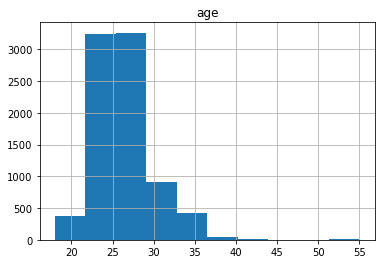

In [29]:
dating[['age']].hist() 

In [34]:
# What do women want? #What do women want
attractiveness = dating.groupby('gender').attr1_1.mean()
attractiveness



gender
0    18.055224
1    26.921689
Name: attr1_1, dtype: float64

In [41]:
Sincere = dating.groupby('gender').sinc1_1.mean()
Sincere







gender
0    18.305008
1    16.498436
Name: sinc1_1, dtype: float64

In [42]:
Intelligent = dating.groupby('gender').intel1_1.mean()
Intelligent

gender
0    21.002502
1    19.537374
Name: intel1_1, dtype: float64

In [43]:
Fun = dating.groupby('gender').fun1_1.mean()
Fun



gender
0    17.147292
1    17.763893
Name: fun1_1, dtype: float64

In [44]:
Ambitious = dating.groupby('gender').amb1_1.mean()
Ambitious

gender
0    12.827222
1     8.552829
Name: amb1_1, dtype: float64

In [45]:
Shared = dating.groupby('gender').shar1_1.mean()
Shared

gender
0    12.704194
1    10.996574
Name: shar1_1, dtype: float64

# Interesting Findings so far...

- Male and Female participation roughly equal.
- mean age similar across genders
- potential outlier, mean age overall is 26.36 however max age was 55 (may consider removing the data from this participant)
- Men's appear to rate attractiveness to be a more important quality  compared to female's self reported value on attractivness 
- Men seem to care less about a potential partner's level of ambition compared to women. 


## Draft out Visualisation

I am looking to create data visualations such as:
 - box and whisker plots to visually convey the information provided above ie how different sexes view the importance of each quality in finding a mate.

- pair-wise scatter plot matrix to discover if any of the variables are correlated with each other. Of particular interest would be whether self-reported measures of each quality match up with how other people see each participant. eg Does someone rate themselves as more/less attractive than the opposite sex report them to be?
- this could lead to construction of a new feature "Self-confidence" and I could look at whether those with more self confidence are more likely to be asked on a second date; explore the idea of 'fake it till you make it'.


## Regression Techniques
- Regularisation techniques to find out which factors of attractivness, intelligence, ambition, fun, similar interests are the most important in determining the liklihood of a second date. 

- I could then use logistic regression to create a predictive model using the most appropriate predictive variables. Can I accurately predict whether someone will get a second date? 
